In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float, img_as_ubyte
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)

from skimage.color import rgb2gray, label2rgb

In [2]:
from skimage.morphology import erosion, dilation
from skimage.morphology import opening, closing
from skimage.morphology import disk
#Ctrl+Shift+ -

In [3]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()
    

In [4]:
image = img_as_float(data.camera())
#image = np.copy(image)
#image = rgb2gray(image)
# img_as_ubyte(data.shepp_logan_phantom())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


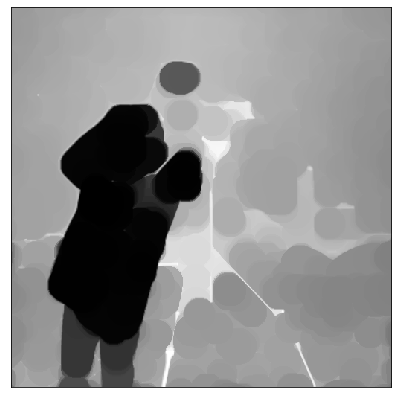

In [5]:
#por alguna razon necesita importarse cada vez que se vaya a usar
#from skimage.morphology import closing


image_closed = image.copy()

#Primero elimianr patas de la camara. 

#Elegir el elemento de estructura: cruz-1,cuadro-1.5 , disco2, hexagono
structure_element=disk(20.5)#np.array([[1,-1,-1],[-1,1,-1],[-1,-1,1]])#disk(3)
print(structure_element)
#usar operador de clausura
closing_ = closing(image_closed ,structure_element )
imshow(closing_)


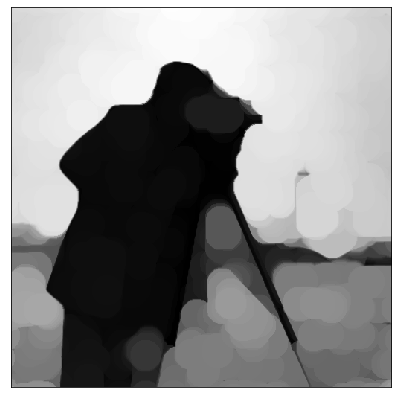

In [6]:
#Ahora hacer un operador de apertura
opening_ = opening(image_closed ,structure_element )
imshow(opening_)

#invert colors
from skimage.util import invert
invert_=invert(closing_,signed_float=True)
imshow(img_as_float(invert))


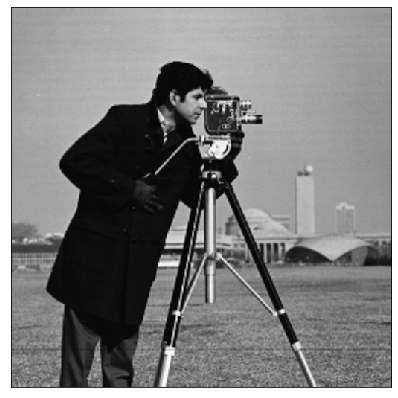

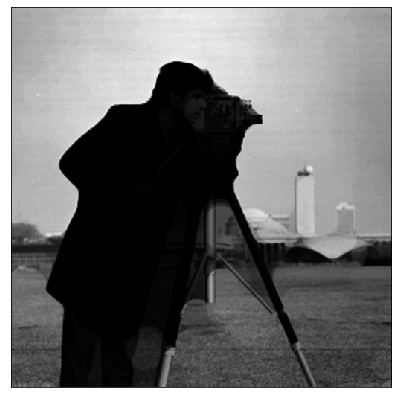

In [7]:
#Usar ese filto a la imagen original, usnado Multipicando a esta y la original
imshow(image)
imshow(image * opening_)